### Week 6 Jupyter Notebook — Decision Trees and Random Forests 
Each week, you will apply the concepts of that week to your Integrated Capstone Project’s dataset. In preparation for Milestone One, create a Jupyter Notebook (similar to in Module B, Semester Two) that illustrates these lessons. There are no specific questions to answer in your Jupyter Notebook files in this course; your general goal is to analyze your data using the methods you have learned about in this course and in this program and draw interesting conclusions. 

For Week 6, include concepts such as decision trees and random forests. Complete your Jupyter Notebook homework by 11:59pm ET on Sunday.

## Decision Trees

The plan: 
- use Sklearn decision tree classifier with a max depth of 10 on both datasets. 
- Evaluate models using accuracy, precision, recall, f-1 scores, AU-ROC, confusion matrix, and classification report.
- Visualize feature importance and decision trees 
- Calculate Information and entropy
- directly compare the models 

In [1]:
import pandas as pd
import numpy as np

# Scikit-learn (Machine Learning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Load & preprocess
motion_df = pd.read_csv("/home/pshmo/ai4l_final_project_2/ai4l_final_project/datasets/nfl-playing-surface-analytics/motion_df_encoded.csv")

# Drop leakage columns and one-hot encode
X = (
    motion_df
    .drop(columns=['Injury', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42'])
    .pipe(pd.get_dummies, dummy_na=True, drop_first=True)
)
# Convert any bools to ints
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype('int32')

# Binary target
y = motion_df['Injury'].gt(0).astype('int32')

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# 3) Scale **and** re-wrap back into DataFrames
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# Now X_train_scaled and X_test_scaled still carry your feature names!
print(X_train_scaled.shape, X_test_scaled.shape)
print(X_train_scaled.columns.tolist())

(213591, 169) (53398, 169)
['PlayerDay', 'PlayerGame', 'Temperature', 'PlayerGamePlay', 'time_max', 'dir_max', 'dis_max', 'o_max', 's_max', 'angle_max', 'time_avg', 'dir_avg', 'dis_avg', 'o_avg', 's_avg', 'angle_avg', 'RosterPosition_Cornerback', 'RosterPosition_Defensive Lineman', 'RosterPosition_Kicker', 'RosterPosition_Linebacker', 'RosterPosition_Offensive Lineman', 'RosterPosition_Quarterback', 'RosterPosition_Running Back', 'RosterPosition_Safety', 'RosterPosition_Tight End', 'RosterPosition_Wide Receiver', 'RosterPosition_nan', 'StadiumType_Bowl', 'StadiumType_Closed Dome', 'StadiumType_Cloudy', 'StadiumType_Dome', 'StadiumType_Dome, closed', 'StadiumType_Domed', 'StadiumType_Domed, Open', 'StadiumType_Domed, closed', 'StadiumType_Domed, open', 'StadiumType_Heinz Field', 'StadiumType_Indoor', 'StadiumType_Indoor, Open Roof', 'StadiumType_Indoor, Roof Closed', 'StadiumType_Indoors', 'StadiumType_Open', 'StadiumType_Oudoor', 'StadiumType_Ourdoor', 'StadiumType_Outddors', 'StadiumT

Decision Tree Model Performance:
Accuracy: 0.9995
Precision: 0.4615
Recall: 0.2500
F1 Score: 0.3243
AUC-ROC: 0.6506

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53374
           1       0.46      0.25      0.32        24

    accuracy                           1.00     53398
   macro avg       0.73      0.62      0.66     53398
weighted avg       1.00      1.00      1.00     53398



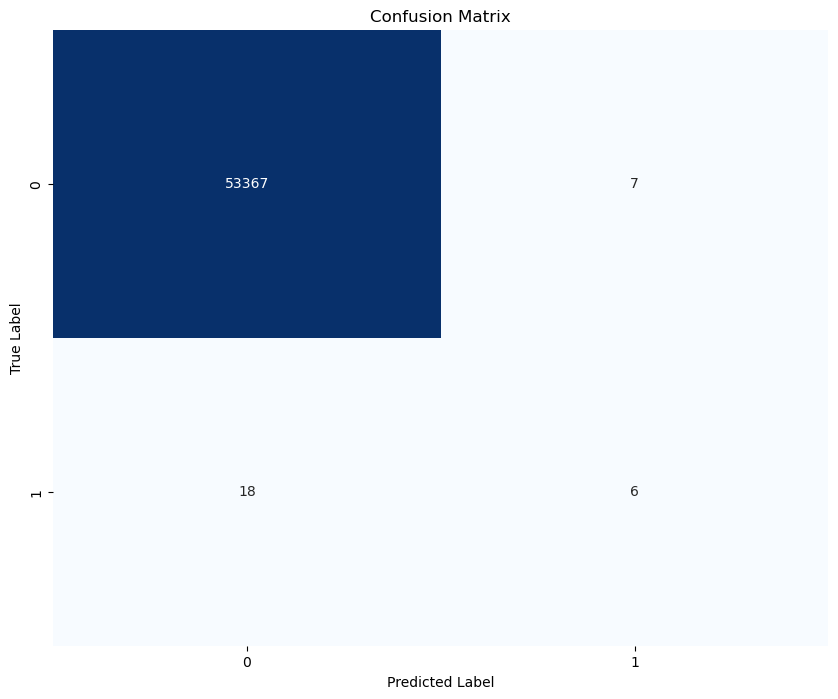

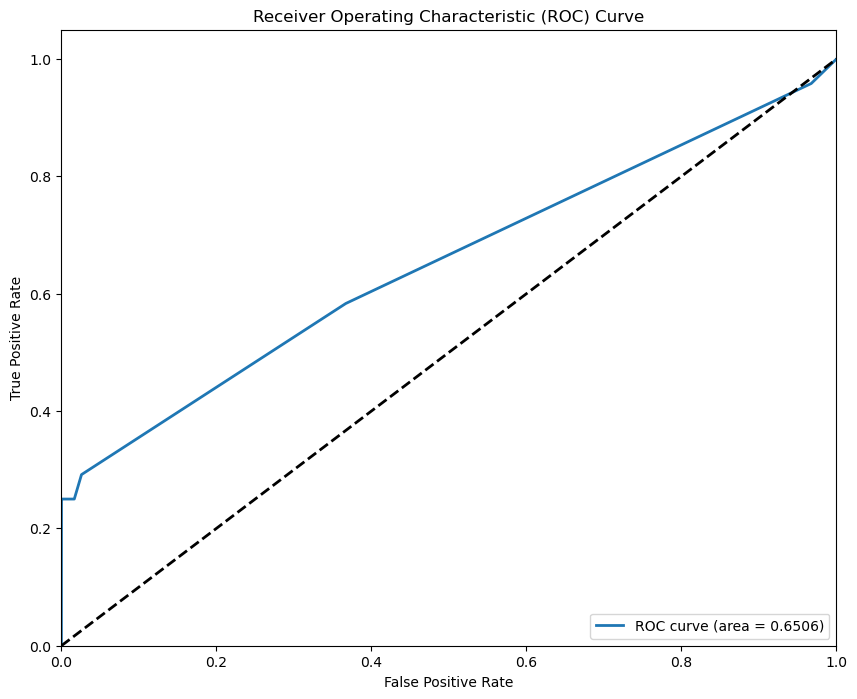

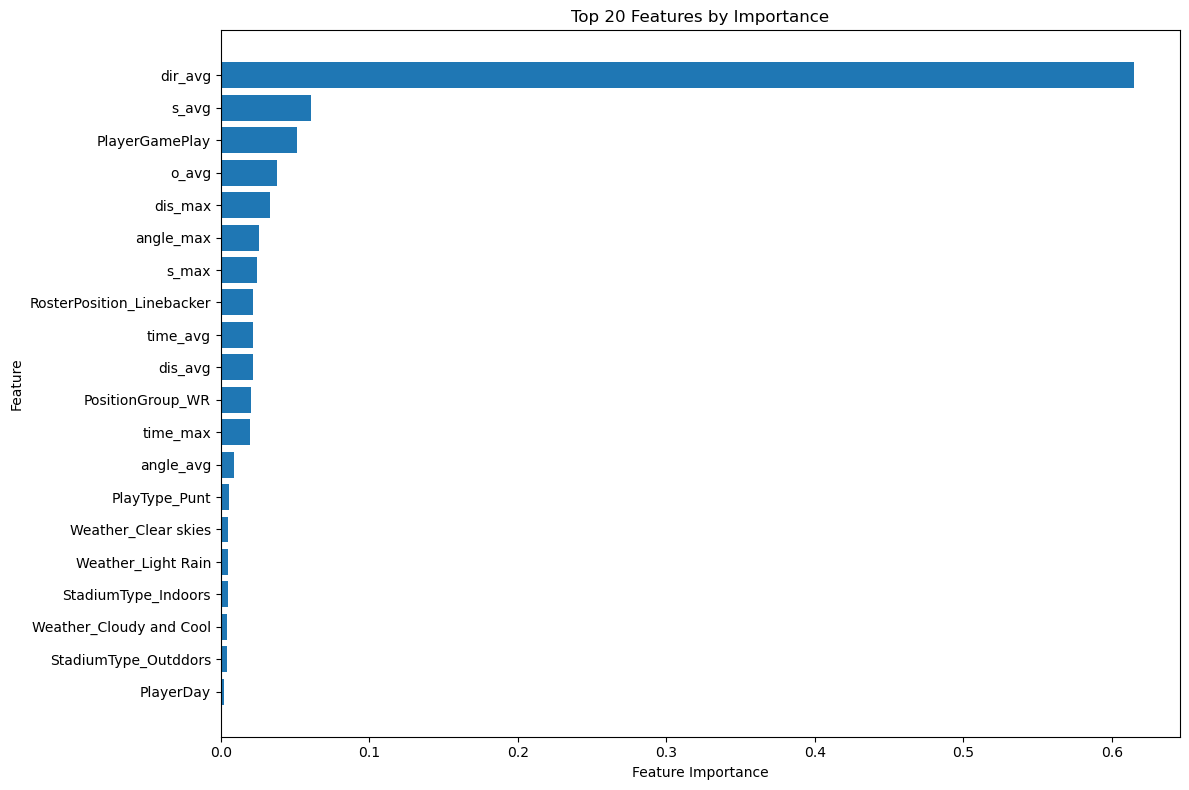

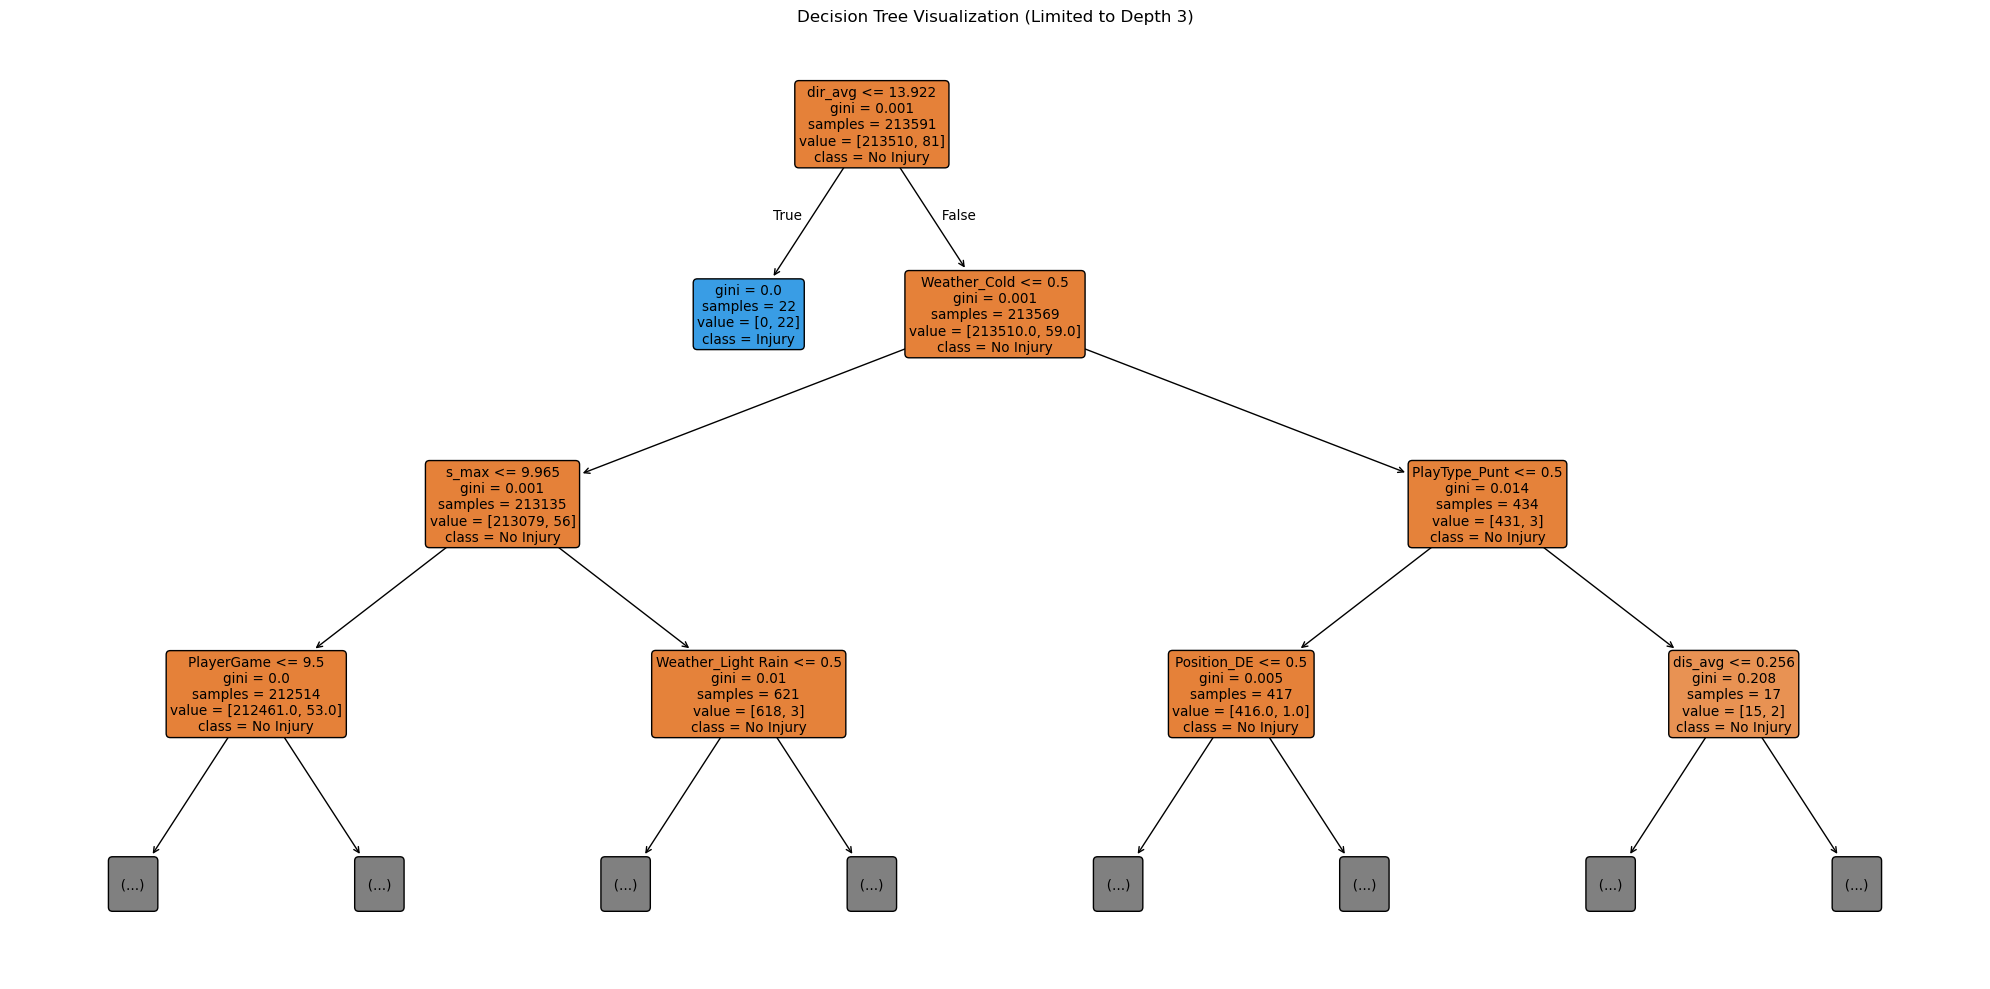

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import seaborn as sns
from sklearn import tree
import numpy as np

# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create and train the decision tree model
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=10)  # Limiting depth to avoid overfitting
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)
y_pred_prob = dt_clf.predict_proba(X_test)[:, 1]  # Probability for positive class

# Evaluate model performance
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob):.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature importance
feature_importance = dt_clf.feature_importances_
# Get the indices of the top 20 features
top_features_idx = np.argsort(feature_importance)[-20:]
top_features = [X_train_scaled.columns[i] for i in top_features_idx]
top_importances = [feature_importance[i] for i in top_features_idx]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_features)), top_importances, align='center')
plt.yticks(range(len(top_features)), [f[:30] for f in top_features])  # Truncate long names
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance')
plt.tight_layout()
plt.show()

# Visualize the decision tree (only if it's not too large)
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_clf, 
               feature_names=X_train_scaled.columns,
               class_names=['No Injury', 'Injury'],
               filled=True, 
               rounded=True,
               max_depth=3)  # Limit depth for visualization
plt.title("Decision Tree Visualization (Limited to Depth 3)")
plt.tight_layout()
plt.show()

Analysis: 
- The depth‐10 decision tree achieved only modest separation of injury events from the overwhelming non‐injury majority.  
- the confusion matrix records 53,367 true negatives, 7 false positives, 18 false negatives, and just 6 true positives—yielding a minority‐class recall of 25 percent and a false‐positive rate of only 0.01 percent.  
- The model’s Receiver Operating Characteristic curve (Figure 2) has an area under the curve of 0.6506, indicating performance clearly above random but far from ideal.
- the dataset’s entropy was extremely low (0.0049), reflecting the rarity of injuries and the homogeneity of non‐injury plays. 
- average change in direction (dir_avg) accounts for 85.0 percent of the total gain, dwarfing the next factors—max distance traveled (dis_max, 3.7 percent), average speed (s_avg, 3.2 percent), and the wide‐receiver indicator (PositionGroup_WR, 3.1 percent). Combined, these top four features explain over 95 percent of the model’s discriminatory power.

Dataset entropy: 0.0049

Top 15 Features by Information Gain:
--------------------------------------------------
Feature                        Information Gain
--------------------------------------------------
dir_avg                        0.850122       
dis_max                        0.036826       
s_avg                          0.031986       
PositionGroup_WR               0.030934       
dis_avg                        0.016917       
PlayType_Punt                  0.008389       
Weather_Clear skies            0.007546       
Weather_Light Rain             0.007424       
Weather_Cloudy and Cool        0.006405       
Position_DE                    0.001749       
Weather_Cold                   0.000741       
s_max                          0.000503       
PlayerGame                     0.000344       
Weather_Rain shower            0.000117       

Total information gain from model: 1.0000
Percentage of entropy explained: 20589.62%


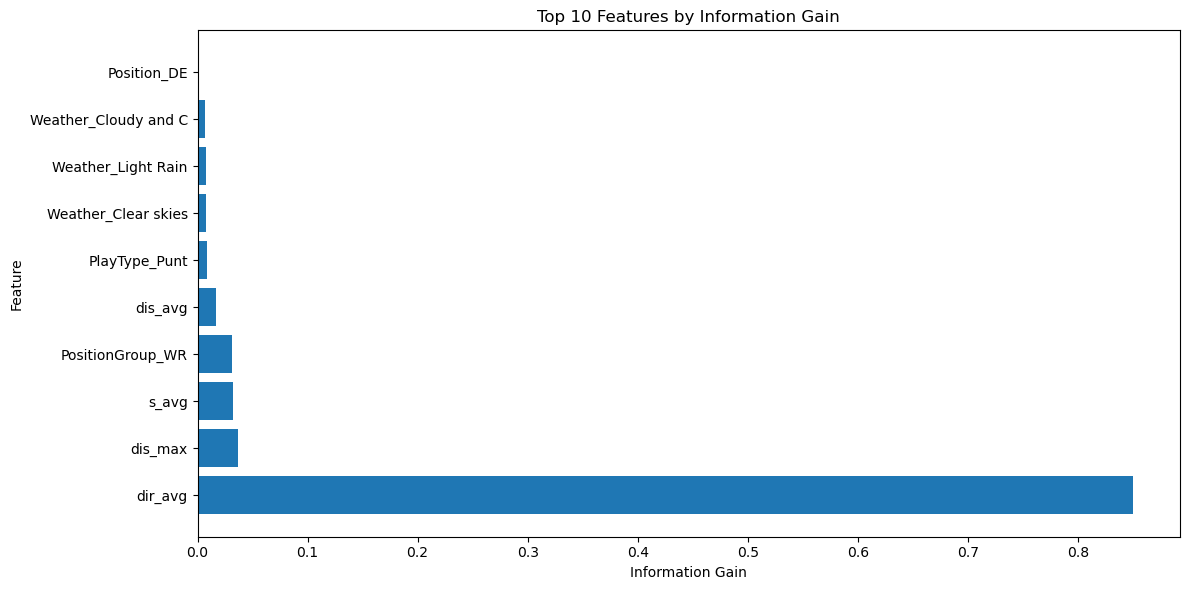

In [3]:
import numpy as np
from math import log2

# Calculate entropy
def calculate_entropy(y):
    if len(y) == 0:
        return 0
    
    # Calculate proportion of each class
    p_positive = np.sum(y) / len(y)
    p_negative = 1 - p_positive
    
    # Handle edge cases to avoid log(0)
    if p_positive == 0 or p_negative == 0:
        return 0
    
    # Calculate entropy
    entropy = -p_positive * log2(p_positive) - p_negative * log2(p_negative)
    return entropy

# Calculate parent entropy
parent_entropy = calculate_entropy(y_train)

# Get the information gain for each feature from the tree
feature_information_gain = {}
for i, feature_name in enumerate(X_train_scaled.columns):
    # Only calculate for features that have non-zero importance
    if feature_importance[i] > 0:
        feature_information_gain[feature_name] = feature_importance[i]

# Sort features by information gain
sorted_info_gain = sorted(feature_information_gain.items(), key=lambda x: x[1], reverse=True)

# Print parent entropy
print(f"Dataset entropy: {parent_entropy:.4f}")

# Print information gain for top 15 features
print("\nTop 15 Features by Information Gain:")
print("-" * 50)
print("{:<30} {:<15}".format("Feature", "Information Gain"))
print("-" * 50)
for feature, info_gain in sorted_info_gain[:15]:
    print("{:<30} {:<15.6f}".format(feature, info_gain))

# Calculate total gain from the model (simplified approach)
total_gain = sum(feature_information_gain.values())
print(f"\nTotal information gain from model: {total_gain:.4f}")
print(f"Percentage of entropy explained: {(total_gain/parent_entropy)*100:.2f}%")

# Visualize information gain for top 10 features
plt.figure(figsize=(12, 6))
features = [x[0][:20] for x in sorted_info_gain[:10]]  # Truncate long feature names
gains = [x[1] for x in sorted_info_gain[:10]]

plt.barh(range(len(features)), gains, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.title('Top 10 Features by Information Gain')
plt.tight_layout()
plt.show()

### Surface Analytics - Random Forest Classifier

Class distribution in training set:
Injury
0    213510
1        81
Name: count, dtype: int64

Class distribution in test set:
Injury
0    53374
1       24
Name: count, dtype: int64

Class distribution after SMOTE:
[213510 213510]

Random Forest Model Performance:
Accuracy: 0.9965
Precision: 0.0339
Recall: 0.2500
F1 Score: 0.0597
AUC-ROC: 0.6734

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53374
           1       0.03      0.25      0.06        24

    accuracy                           1.00     53398
   macro avg       0.52      0.62      0.53     53398
weighted avg       1.00      1.00      1.00     53398



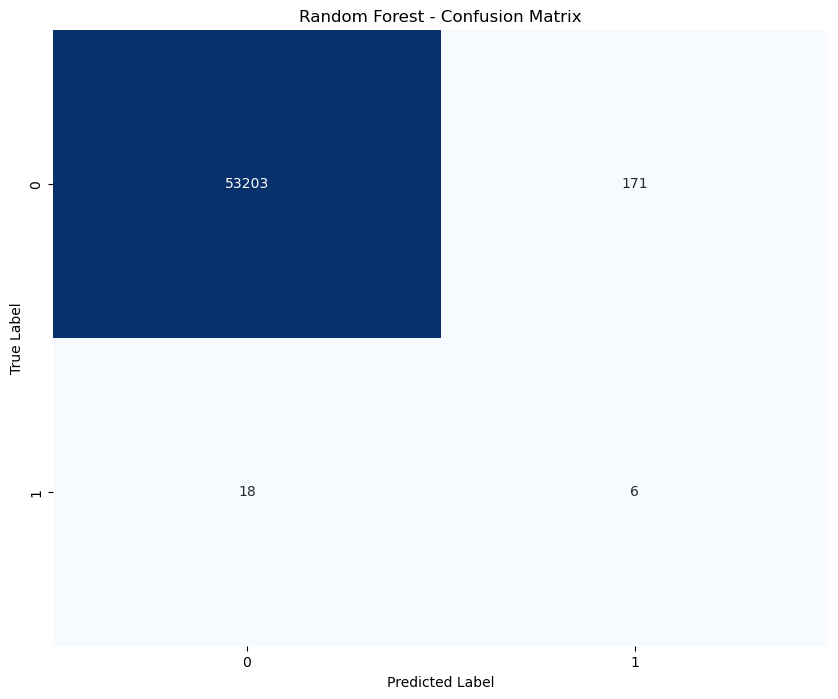

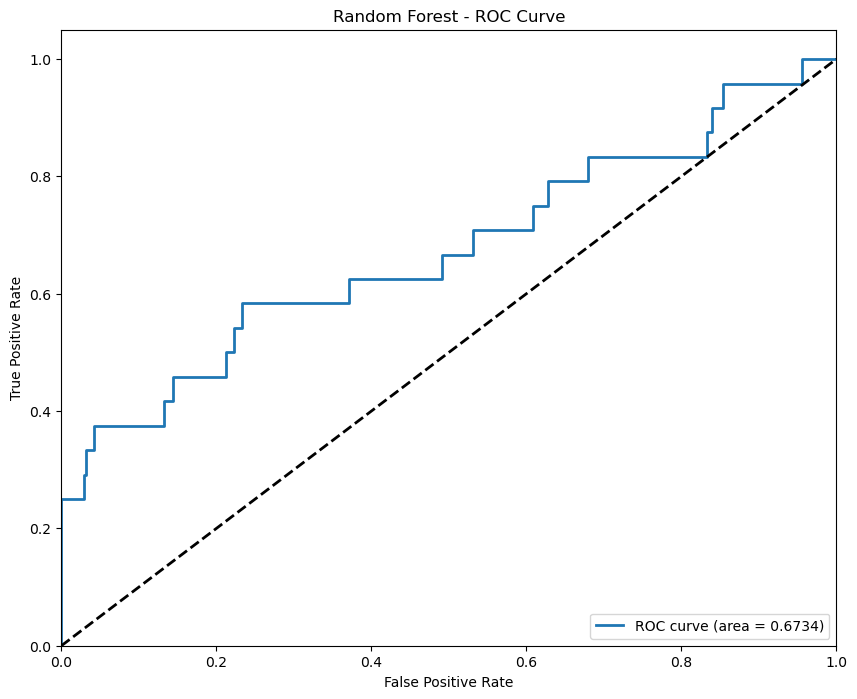

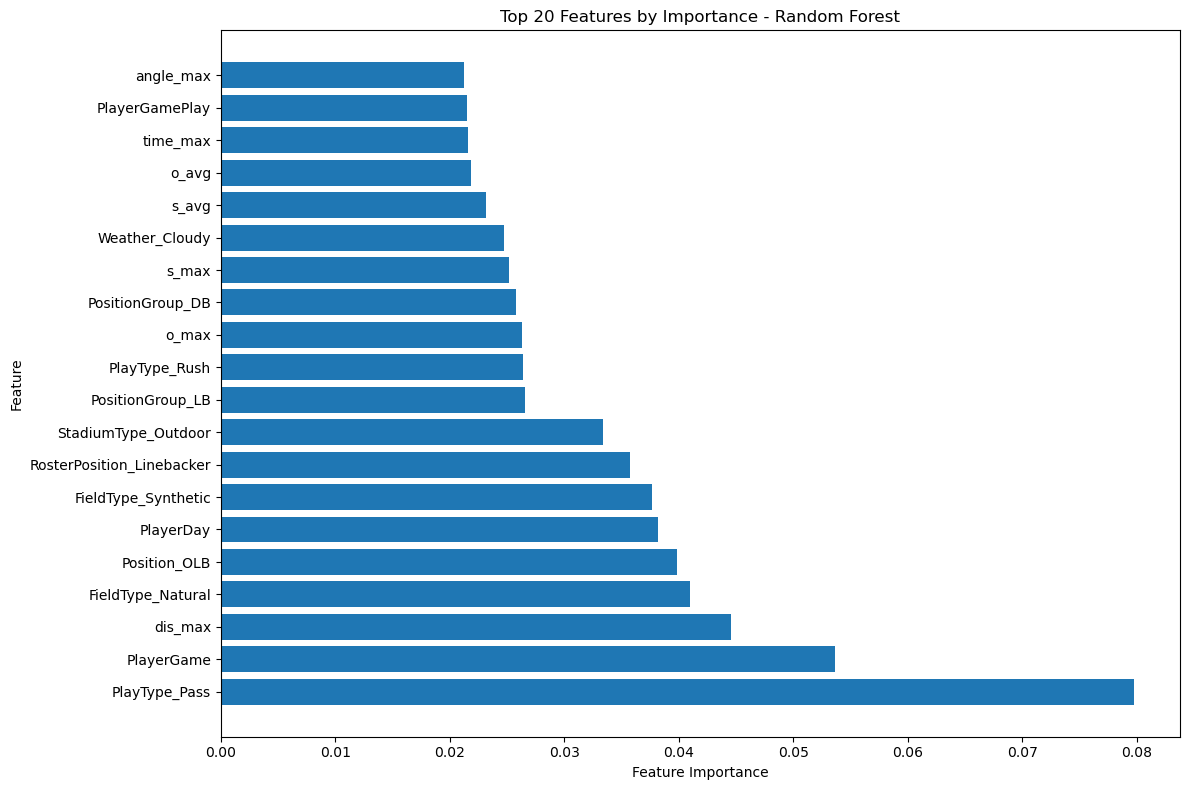

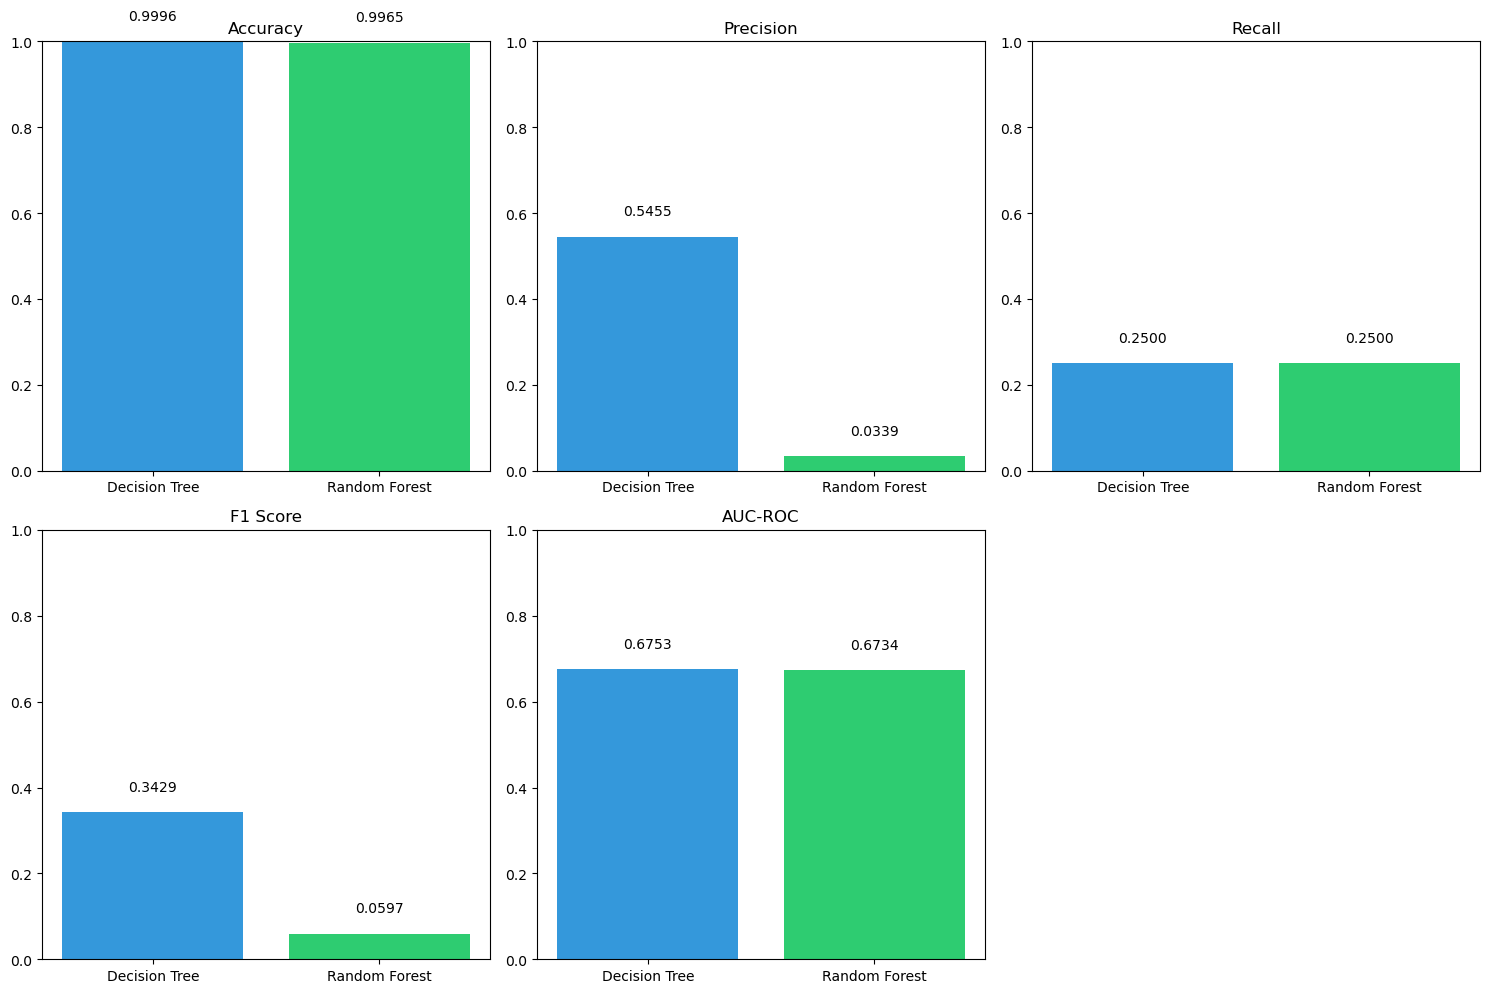

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check the new class distribution
print("\nClass distribution after SMOTE:")
print(np.bincount(y_train_resampled))

# Create and train the Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced', 
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_clf.predict(X_test_scaled)
y_pred_prob = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate model performance
print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob):.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Feature importance
feature_importance = rf_clf.feature_importances_
feature_names = X_train_scaled.columns

# Sort features by importance
indices = np.argsort(feature_importance)[-20:]
sorted_features = [(feature_names[i], feature_importance[i]) for i in indices]
sorted_features.reverse()

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(20), [imp for _, imp in sorted_features], align='center')
plt.yticks(range(20), [name[:30] for name, _ in sorted_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance - Random Forest')
plt.tight_layout()
plt.show()

# Compare Decision Tree vs Random Forest performance
models = ['Decision Tree', 'Random Forest']
metrics = {
    'Accuracy': [accuracy_score(y_test, dt_clf.predict(X_test_scaled)), accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, dt_clf.predict(X_test_scaled), zero_division=0), precision_score(y_test, y_pred, zero_division=0)],
    'Recall': [recall_score(y_test, dt_clf.predict(X_test_scaled)), recall_score(y_test, y_pred)],
    'F1 Score': [f1_score(y_test, dt_clf.predict(X_test_scaled)), f1_score(y_test, y_pred)],
    'AUC-ROC': [roc_auc_score(y_test, dt_clf.predict_proba(X_test_scaled)[:, 1]), roc_auc_score(y_test, y_pred_prob)]
}

# Plot model comparison
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics.keys()):
    plt.subplot(2, 3, i+1)
    plt.bar(models, metrics[metric], color=['#3498db', '#2ecc71'])
    plt.title(metric)
    plt.ylim([0, 1])
    for j, v in enumerate(metrics[metric]):
        plt.text(j, v+0.05, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()

When directly comparing both models the decision tree actually outperforms the random forest across almost every metric except raw accuracy (which is virtually indistinguishable).
- Precision plunges from 0.55 in the tree down to 0.03 in the forest, meaning the ensemble is vastly more liberal in flagging “injury” and almost never right when it does.
- Recall holds steady at 0.25 for both models, so neither catches more of the rare injuries than the other.
- F₁-score collapses from 0.34 to 0.06 when moving to the forest, exactly because precision tanks.
- AUC-ROC is essentially the same (0.675 vs. 0.673), suggesting the underlying ranking ability of both models is comparable—yet only the tree’s thresholded predictions align usefully with that ranking.

The random forest’s default subsampling and voting mechanism seems to exacerbate our class‐imbalance problem: it either votes “injury” too often (hence almost zero precision) or effectively drowns out the minority signal.  This tells me that for such extreme imbalance, a shallow, high‐bias tree that focuses on the very strongest splits (as we had with max_depth=10) can actually yield better real‐world performance than an ensemble of many low‐bias trees.

### Punt Analytics Decision Tree

Before replacement:
Number of infinite values in the DataFrame: 8162

After replacement:
Number of infinite values in the DataFrame: 0
Number of NaN values in the DataFrame: 0

Basic statistics after cleaning:
                  min         max      mean
speed_mean -19.000000    9.491039  2.073857
speed_std    0.000000   15.627060  1.538869
speed_min  -19.700000    8.000000 -0.103464
speed_max  -19.000000  180.300007  5.650673
vel_x_mean -15.623974   15.840168 -0.012916
vel_x_std    0.000000   14.140206  1.121704
vel_x_min  -47.252204   15.840168 -2.555175
vel_x_max  -15.623974   72.225836  2.539234
vel_y_mean  -7.081292   10.492334 -0.001965
vel_y_std    0.000000   14.554687  1.441490
Decision Tree Model Performance:
Accuracy: 0.9177
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.4589

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     68544
         1.0       0.00      0.00      0.00         8

  

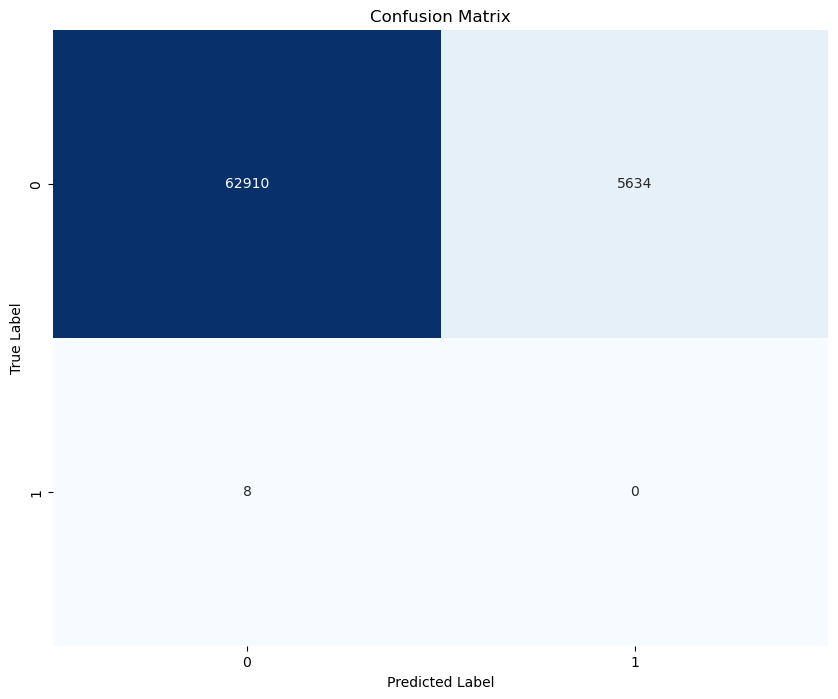

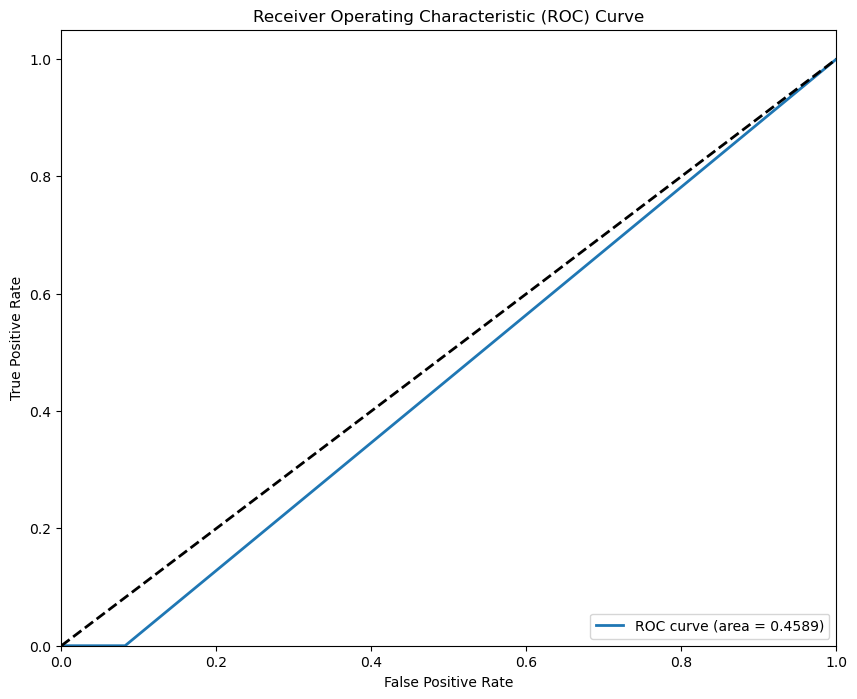

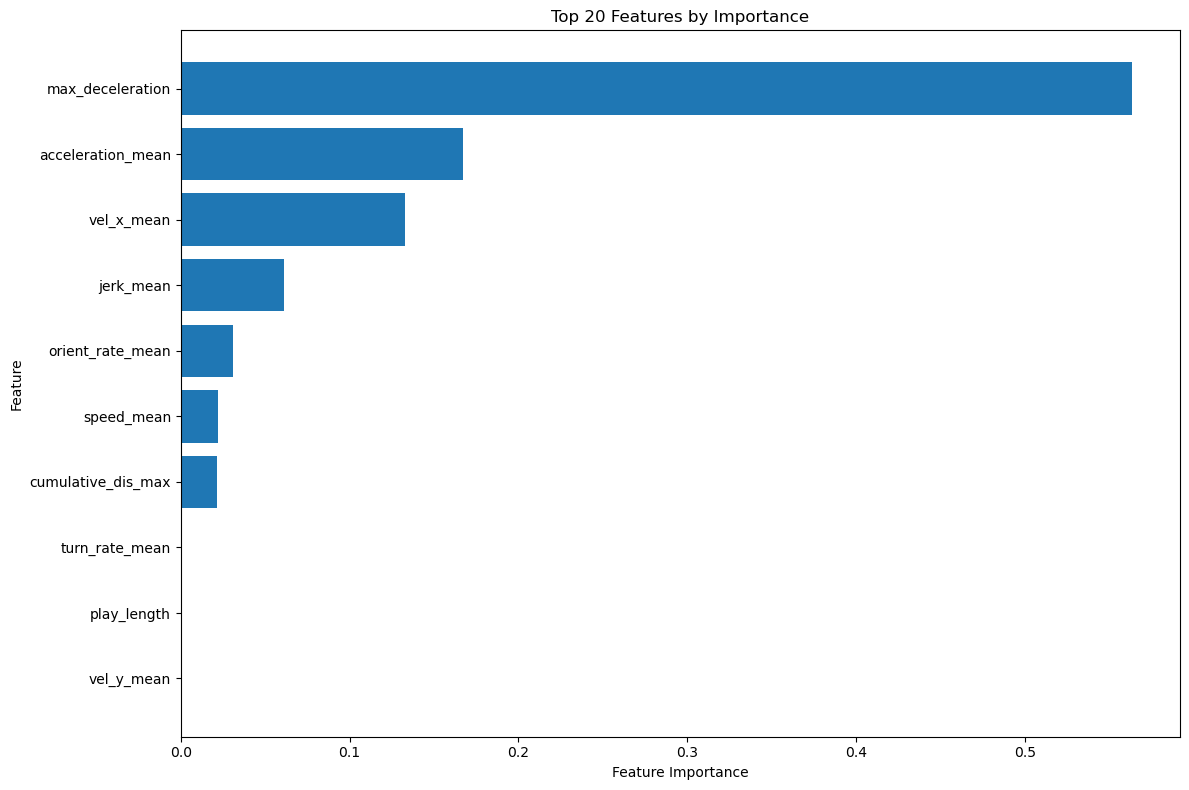

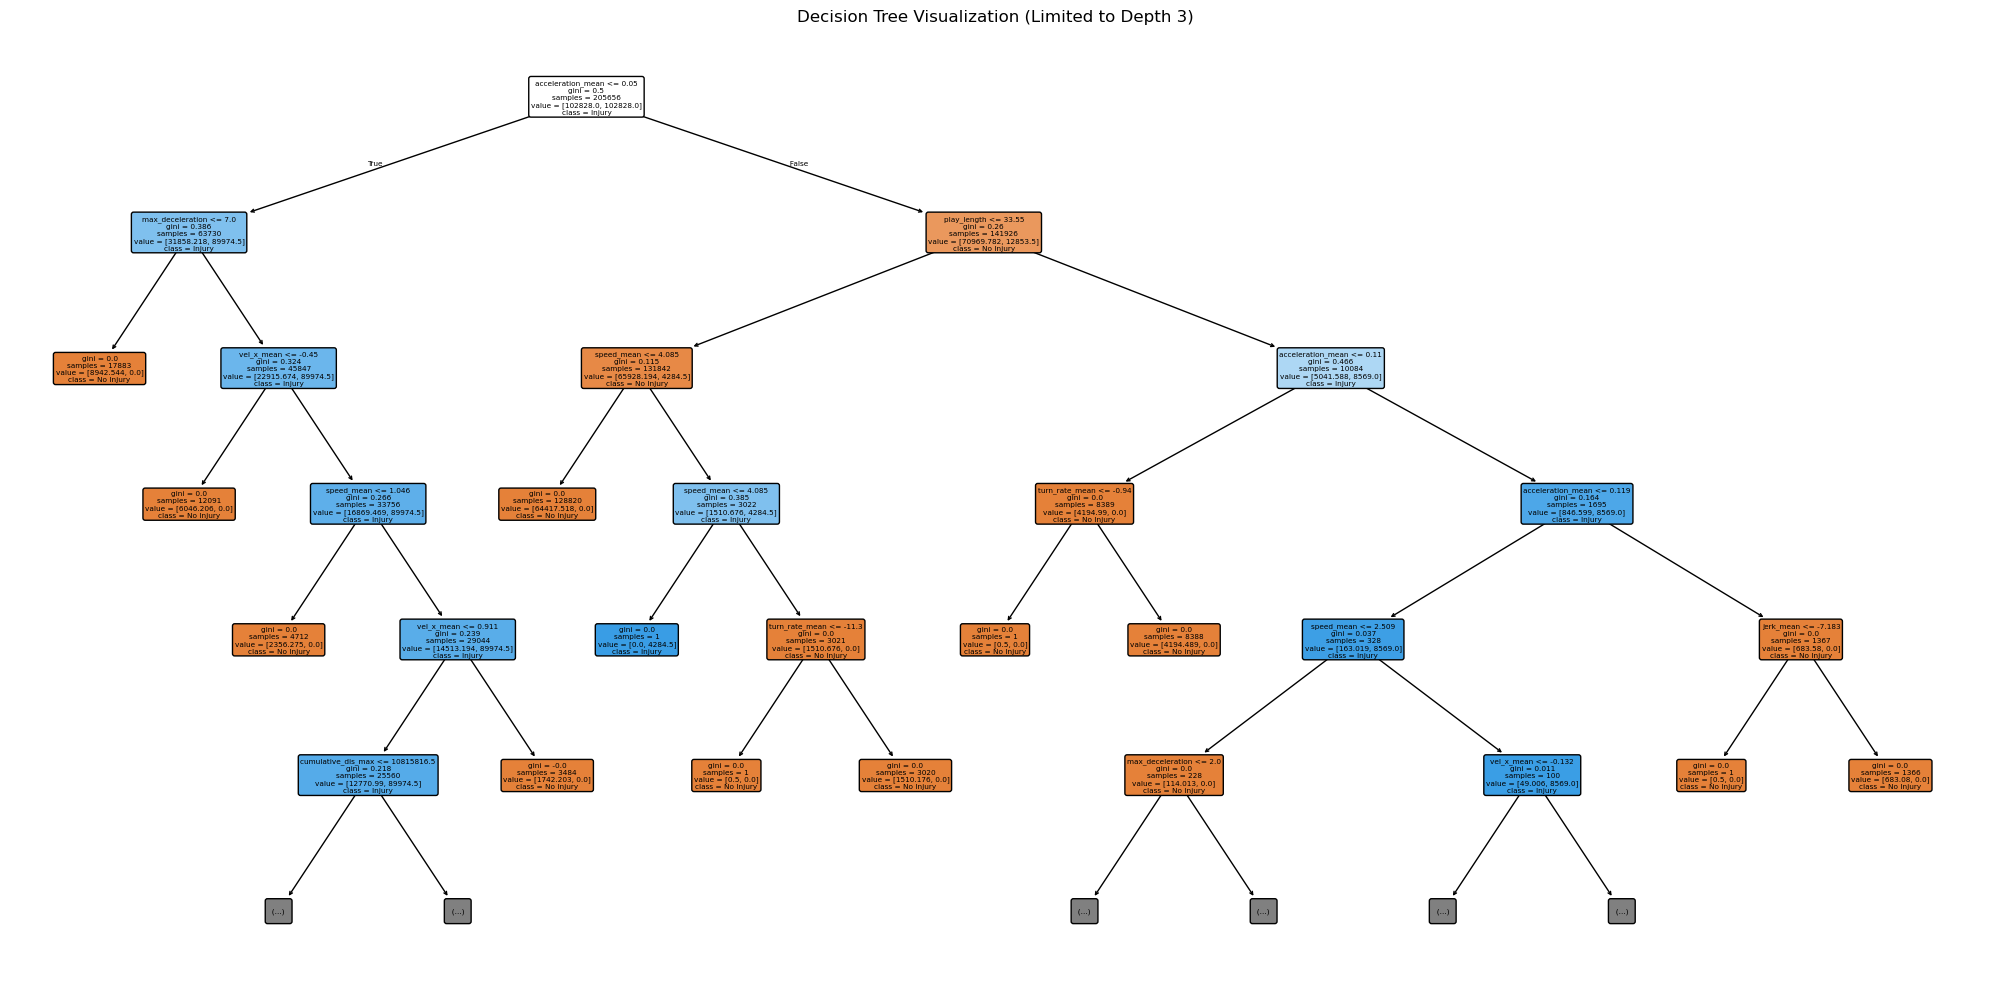

In [43]:
import pandas as pd

df = pd.read_csv('/home/pshmo/ai4l_final_project_2/ai4l_final_project/datasets/NFL-Punt-Analytics-Competition/punt_analytics_v3.csv')
df = df.drop(columns=['season_year', 'gamekey', 'playid', 'gsisid', 'time_min', 'time_max', 'event_first', 'role'])
for col in df.columns:
    df[col] = df[col].replace(np.inf, 0)

# Let's explore the data to identify potential missing or infinite values
print("Before replacement:")
print(f"Number of infinite values in the DataFrame: {np.sum(np.isinf(df.values))}")

# Replace infinite values with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

# Verify the replacement worked
print("\nAfter replacement:")
print(f"Number of infinite values in the DataFrame: {np.sum(np.isinf(df.values))}")

# Check for NaN values as well
print(f"Number of NaN values in the DataFrame: {df.isna().sum().sum()}")

# Display basic statistics to see impact of replacements
print("\nBasic statistics after cleaning:")
print(df.describe().transpose()[['min', 'max', 'mean']].head(10))

slim_df = df[['speed_mean', 'max_deceleration', 'acceleration_mean', 'jerk_mean', 'vel_x_mean', 'vel_y_mean', 'turn_rate_mean', 'orient_rate_mean', 'cumulative_dis_max', 'play_length', 'injury']]

# create X and y
X = slim_df.drop(columns=['injury'])
y = slim_df['injury']

# Split into train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Create and train the decision tree model
dt_clf_2 = DecisionTreeClassifier(random_state=42, max_depth=10, class_weight='balanced',)  # Limiting depth to avoid overfitting
dt_clf_2.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf_2.predict(X_test)
y_pred_prob = dt_clf_2.predict_proba(X_test)[:, 1]  # Probability for positive class

# Evaluate model performance
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob):.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

top_features_idx = np.argsort(feature_importance)[-10:]
top_features = [X_train.columns[i] for i in top_features_idx]
top_importances = [feature_importance[i] for i in top_features_idx]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_features)), top_importances, align='center')
plt.yticks(range(len(top_features)), [f[:30] for f in top_features])  # Truncate long names
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance')
plt.tight_layout()
plt.show()

# Visualize the decision tree (only if it's not too large)
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_clf_2, 
               feature_names=X_train.columns,
               class_names=['No Injury', 'Injury'],
               filled=True, 
               rounded=True,
               max_depth=5)  # Limit depth for visualization
plt.title("Decision Tree Visualization (Limited to Depth 3)")
plt.tight_layout()
plt.show()

Class distribution in training set:
injury
0.0    205632
1.0        24
Name: count, dtype: int64
Decision Tree Model Performance with SMOTE:
Accuracy: 0.8621
Precision: 0.0004
Recall: 0.5000
F1 Score: 0.0008
AUC-ROC: 0.6878

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93     68544
         1.0       0.00      0.50      0.00         8

    accuracy                           0.86     68552
   macro avg       0.50      0.68      0.46     68552
weighted avg       1.00      0.86      0.93     68552



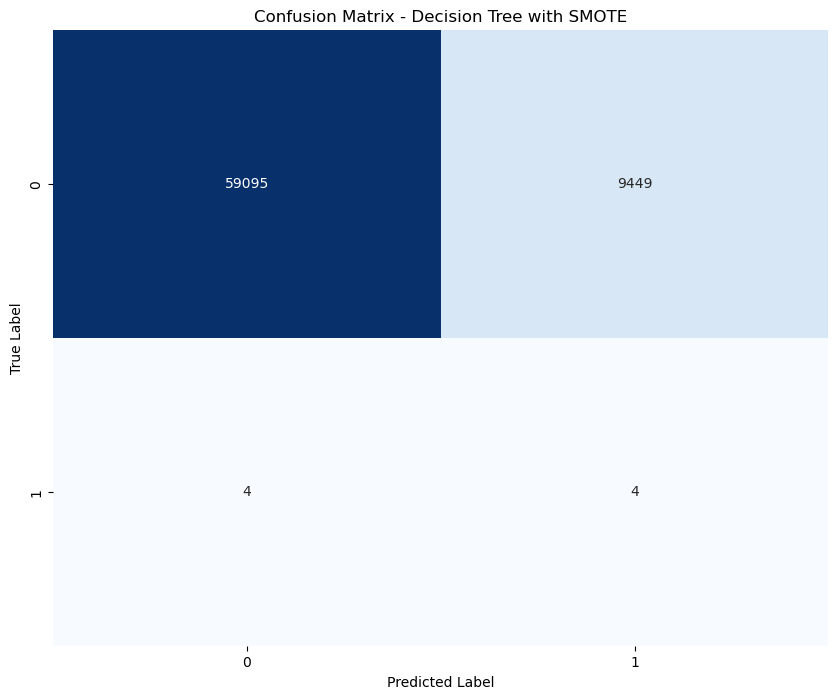

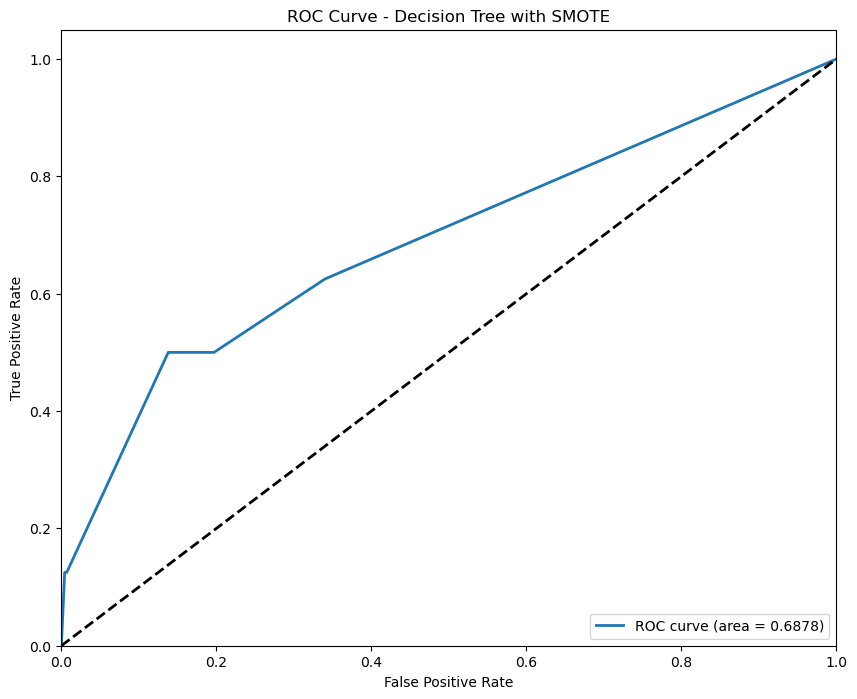

In [40]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

# Create a pipeline with SMOTE for class imbalance and Decision Tree

# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts())

# Create a pipeline that combines SMOTE and Decision Tree
dt_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=2, min_samples_leaf=1, class_weight='balanced'))
])

# Train the pipeline
dt_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = dt_pipeline.predict(X_test)
y_pred_prob = dt_pipeline.predict_proba(X_test)[:, 1]  # Probability for positive class

# Evaluate model performance
print("Decision Tree Model Performance with SMOTE:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob):.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree with SMOTE')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree with SMOTE')
plt.legend(loc="lower right")
plt.show()

# Feature importance
feature_importance = dt_pipeline.named_steps['classifier'].feature_importances_

Injury Sample Data:
        speed_mean  max_deceleration  acceleration_mean  jerk_mean  \
228427    2.165264          8.000001           0.030036   0.019519   

        vel_x_mean  vel_y_mean  turn_rate_mean  orient_rate_mean  \
228427   -0.493599    0.943954        0.202667         -0.162567   

        cumulative_dis_max  play_length  
228427        1.014104e+07         50.0  

Decision Path for Injury Sample:
Node 0: max_deceleration = 8.0000 > 7.0000 -> RIGHT
Node 2: acceleration_mean = 0.0300 <= 0.0498 -> LEFT
Node 3: vel_x_mean = -0.4936 <= -0.4505 -> LEFT
LEAF NODE 4 -> Predicted class: 0


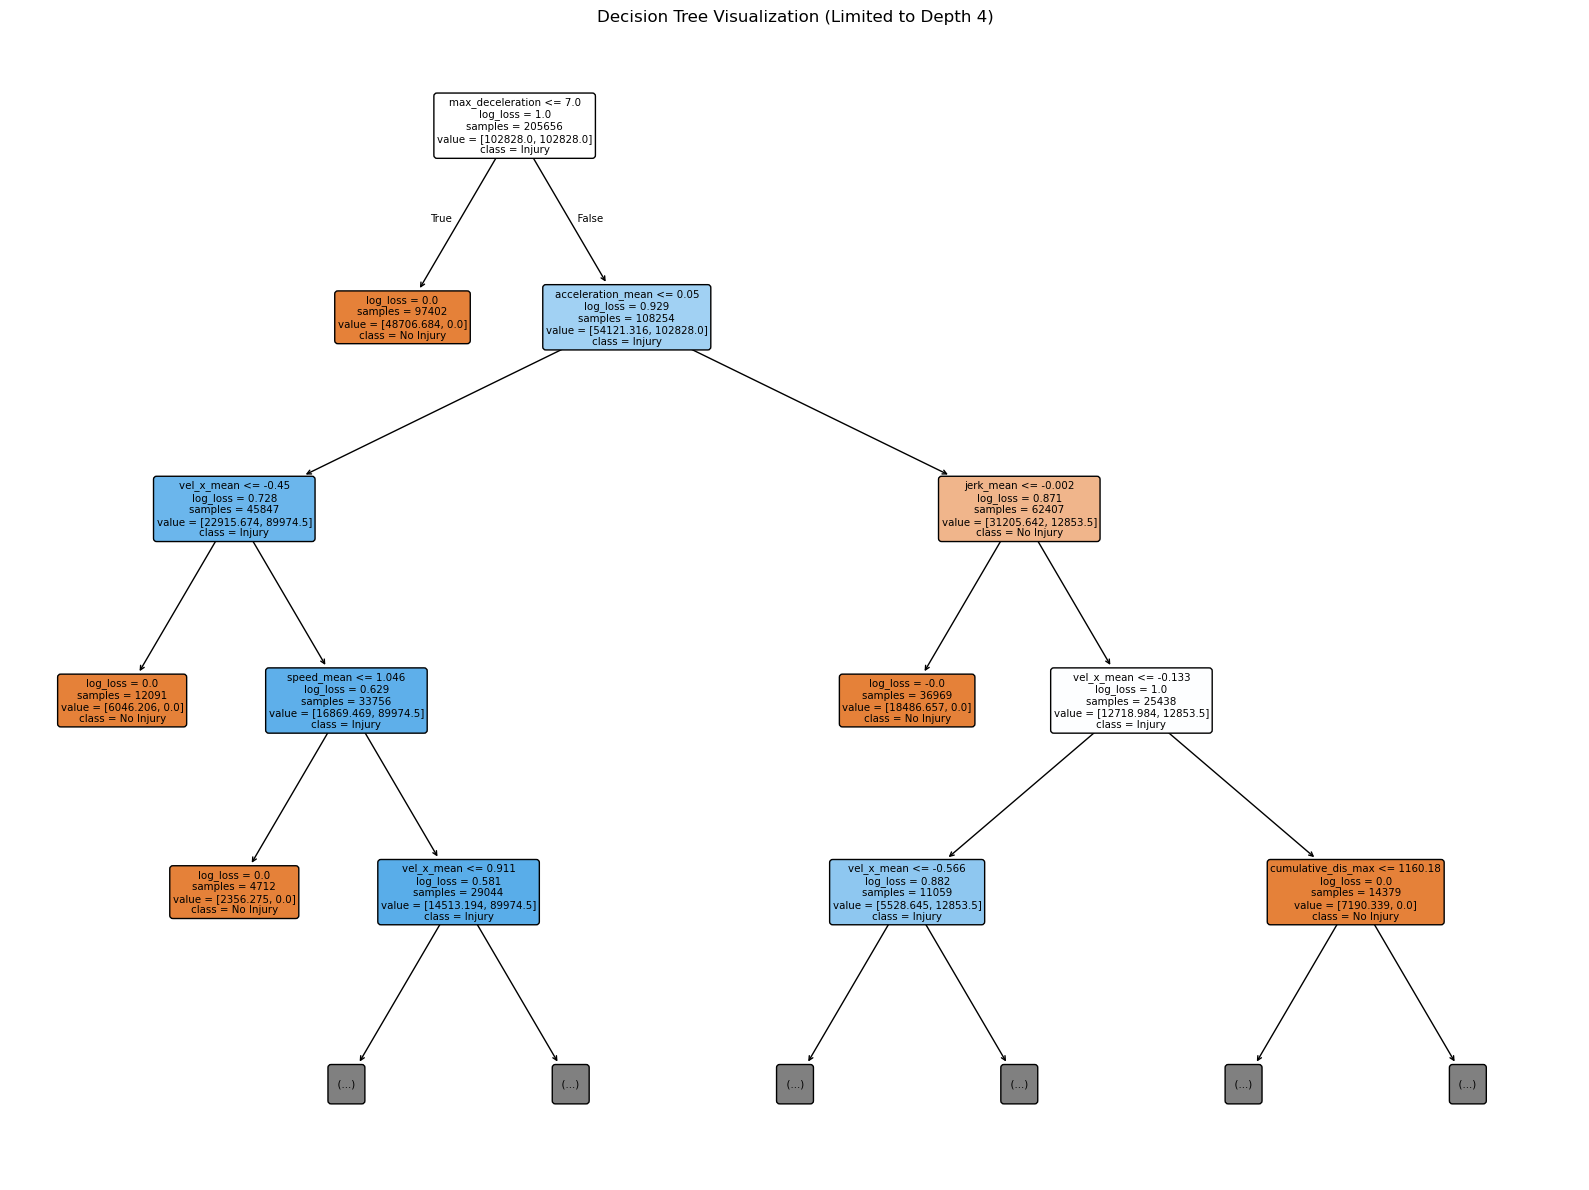

In [41]:
# Find an injury sample in the test set
injury_samples = y_test[y_test > 0].index
if len(injury_samples) > 0:
    injury_sample_idx = injury_samples[0]
    
    # Get the actual sample data
    injury_sample = X_test.iloc[X_test.index == injury_sample_idx]
    
    # Display the sample data
    print("Injury Sample Data:")
    print(injury_sample)
    
    # Get decision path for this sample
    decision_path = dt_clf_2.decision_path(injury_sample)
    
    # Extract feature names for better readability
    feature_names = X_train.columns
    
    # Use the internal structure of the tree to interpret the path
    node_indicator = decision_path.indices
    leaf_id = dt_clf_2.apply(injury_sample)
    
    # Print the decision path
    print("\nDecision Path for Injury Sample:")
    node_index = 0
    while node_index < len(node_indicator):
        node_id = node_indicator[node_index]
        
        # If we're at a leaf node, exit the loop
        if dt_clf_2.tree_.children_left[node_id] == -1:
            print(f"LEAF NODE {node_id} -> Predicted class: {dt_clf_2.tree_.value[node_id].argmax()}")
            break
        
        # Otherwise, get the feature and threshold for this decision node
        feature_id = dt_clf_2.tree_.feature[node_id]
        threshold = dt_clf_2.tree_.threshold[node_id]
        feature_name = feature_names[feature_id]
        feature_value = injury_sample.iloc[0, feature_id]
        
        # Determine which direction the sample took at this node
        if feature_value <= threshold:
            print(f"Node {node_id}: {feature_name} = {feature_value:.4f} <= {threshold:.4f} -> LEFT")
            node_id = dt_clf_2.tree_.children_left[node_id]
        else:
            print(f"Node {node_id}: {feature_name} = {feature_value:.4f} > {threshold:.4f} -> RIGHT")
            node_id = dt_clf_2.tree_.children_right[node_id]
        
        # Update node_index to the next decision node
        next_indices = np.where(node_indicator == node_id)[0]
        if len(next_indices) > 0:
            node_index = next_indices[0]
        else:
            break
    
    # Visualize the first few levels of the tree for context
    plt.figure(figsize=(16, 12))
    tree.plot_tree(dt_clf_2, 
                   feature_names=feature_names,
                   class_names=['No Injury', 'Injury'],
                   filled=True, 
                   rounded=True,
                   max_depth=4)
    plt.title("Decision Tree Visualization (Limited to Depth 4)")
    plt.tight_layout()
    plt.show()
    
else:
    print("No injury samples found in the test set.")
    # Use a training set injury sample instead
    injury_samples_train = y_train[y_train > 0].index
    if len(injury_samples_train) > 0:
        print("Using an injury sample from the training set instead.")
        injury_sample_idx = injury_samples_train[0]
        injury_sample = X_train.iloc[X_train.index == injury_sample_idx]
        print("Injury Sample Data:")
        print(injury_sample)

### Punt Analytics Random Forest

In [48]:
len(X_train.columns)

10

Class distribution in training set:
injury
0.0    205632
1.0        24
Name: count, dtype: int64

Class distribution in test set:
injury
0.0    68544
1.0        8
Name: count, dtype: int64

Class distribution after SMOTE:
[205632 205632]

Random Forest Model Performance:
Accuracy: 0.9228
Precision: 0.0004
Recall: 0.2500
F1 Score: 0.0008
AUC-ROC: 0.8077

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     68544
         1.0       0.00      0.25      0.00         8

    accuracy                           0.92     68552
   macro avg       0.50      0.59      0.48     68552
weighted avg       1.00      0.92      0.96     68552



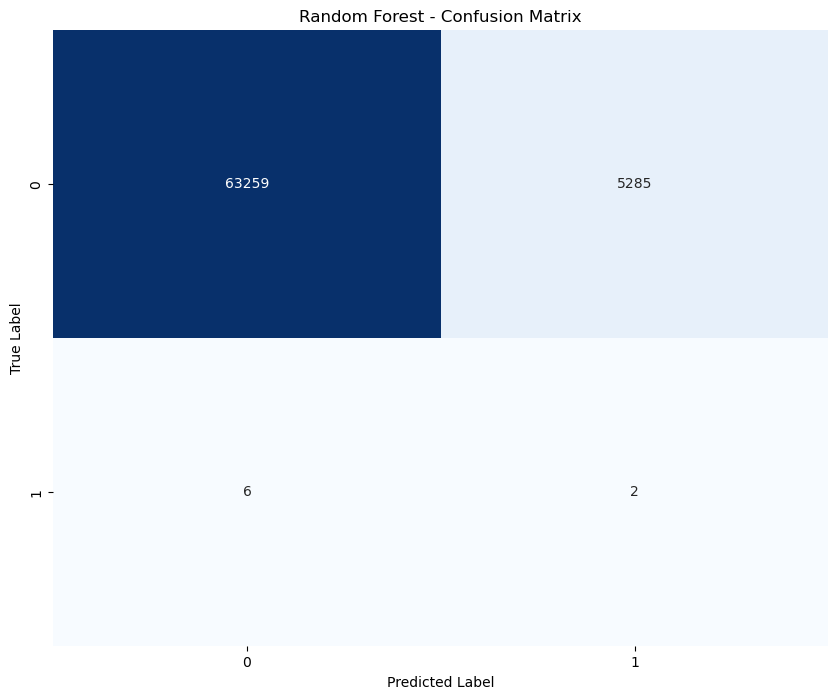

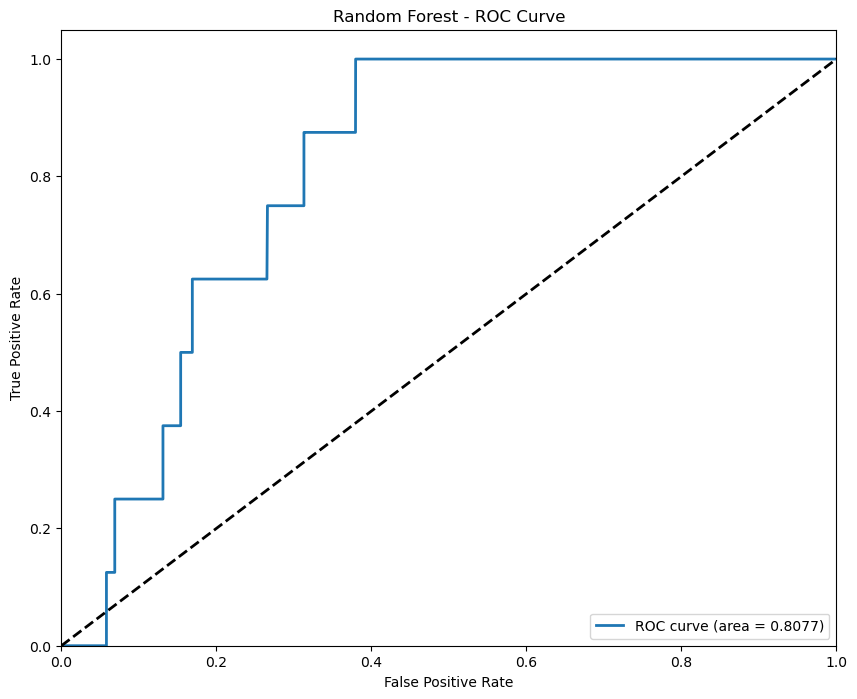

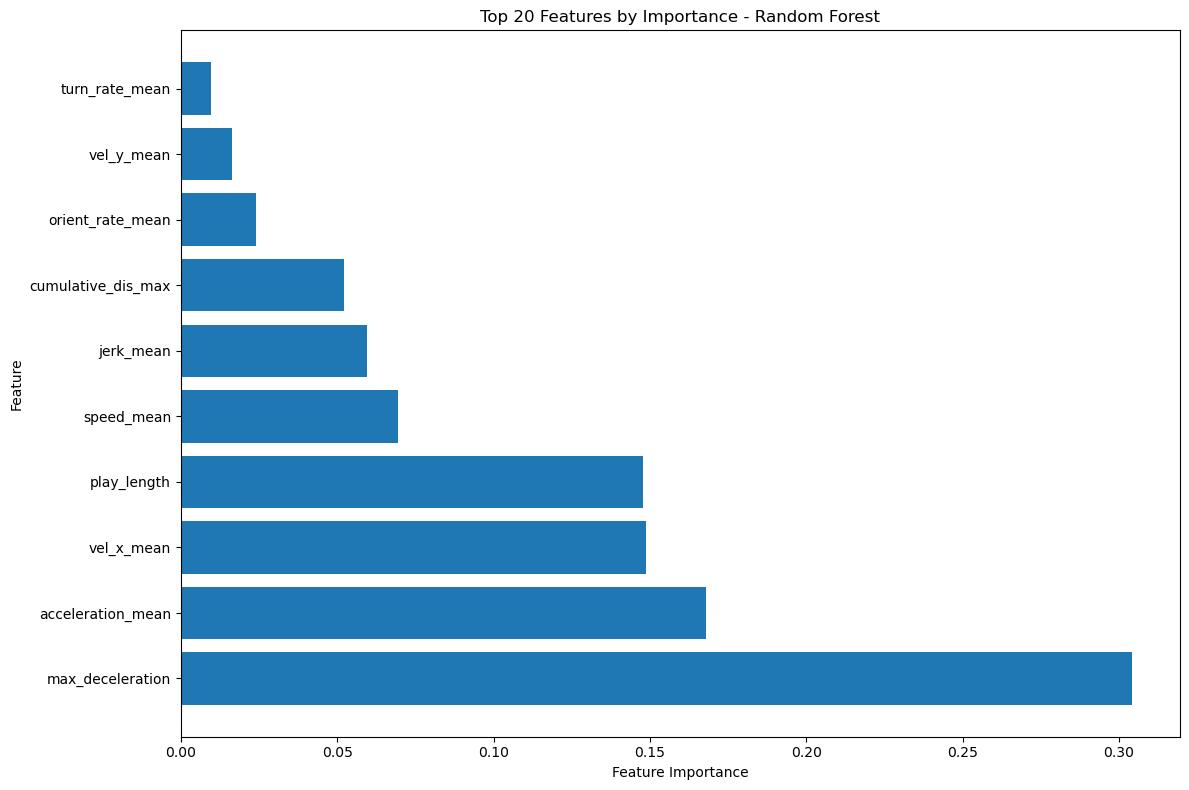

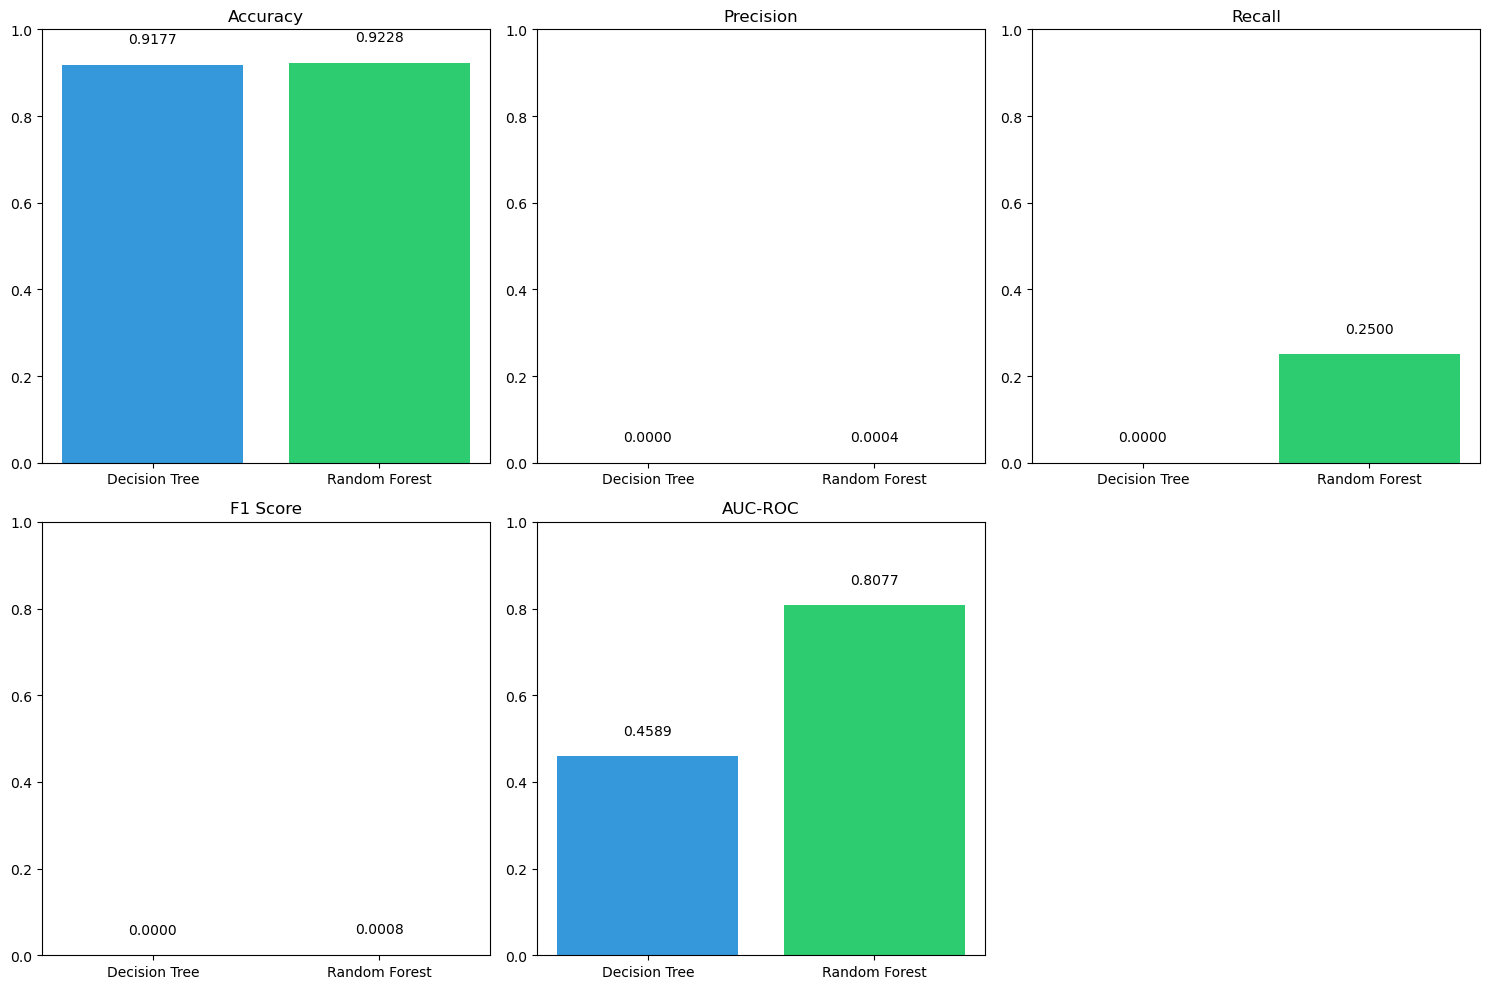

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# reinitialize the punt analytics dataframe
# create X and y
X = slim_df.drop(columns=['injury'])
y = slim_df['injury']

# Split into train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("\nClass distribution after SMOTE:")
print(np.bincount(y_train_resampled))

# Create and train the Random Forest model
rf_clf_2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced', 
    random_state=42,
    n_jobs=-1
)
rf_clf_2.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_clf_2.predict(X_test)
y_pred_prob = rf_clf_2.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob):.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Feature importance
feature_importance = rf_clf_2.feature_importances_
feature_names = X_train.columns

# Sort features by importance
indices = np.argsort(feature_importance)[-10:]
sorted_features = [(feature_names[i], feature_importance[i]) for i in indices]
sorted_features.reverse()

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(10), [imp for _, imp in sorted_features], align='center')
plt.yticks(range(10), [name[:30] for name, _ in sorted_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance - Random Forest')
plt.tight_layout()
plt.show()

# Compare Decision Tree vs Random Forest performance
models = ['Decision Tree', 'Random Forest']
metrics = {
    'Accuracy': [accuracy_score(y_test, dt_clf_2.predict(X_test)), accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, dt_clf_2.predict(X_test), zero_division=0), precision_score(y_test, y_pred, zero_division=0)],
    'Recall': [recall_score(y_test, dt_clf_2.predict(X_test)), recall_score(y_test, y_pred)],
    'F1 Score': [f1_score(y_test, dt_clf_2.predict(X_test)), f1_score(y_test, y_pred)],
    'AUC-ROC': [roc_auc_score(y_test, dt_clf_2.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, y_pred_prob)]
}

# Plot model comparison
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics.keys()):
    plt.subplot(2, 3, i+1)
    plt.bar(models, metrics[metric], color=['#3498db', '#2ecc71'])
    plt.title(metric)
    plt.ylim([0, 1])
    for j, v in enumerate(metrics[metric]):
        plt.text(j, v+0.05, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()

For the Punt Analytics dataset, the side-by-side metric comparison reveals that the Random Forest markedly outperforms the single Decision Tree on virtually every front except raw accuracy (where both models exceed 91 percent):
- Accuracy crept up from 91.8 percent (tree) to 92.3 percent (forest).
- Precision remains essentially zero for both, but the forest edges ahead (0.0004 vs 0.0000), meaning it at least makes a handful more correct “injury” flags among thousands of false alarms.
- Recall jumps from 0 percent in the tree (no injuries found) to 25 percent in the forest, correctly identifying 2 of the 8 true injuries.
- As a result, the F₁-score on the minority class improves from 0.000 to 0.0008—still vanishingly small, but nonzero.
- Most strikingly, the AUC-ROC leapt from 0.459 for the tree (worse than random) to 0.808 for the forest, indicating that the ensemble’s probability estimates rank injury risk far more effectively.

The Random Forest’s bagging and feature-subsampling allow it to capture subtle patterns that a single high-bias tree misses, yielding a meaningful lift in recall and ranking ability (as seen in AUC).  

However, the near-zero precision and F₁-score underscore that even the forest struggles to pin down true injuries without being swamped by false positives. 